In [2]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import norm, skew
from scipy import stats
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
#njobs = 4

In [220]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [221]:
#Save the 'Id' column
trainid = df_train['Id']
testid = df_test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)


__concat two dataset__

In [222]:
print(df_train.shape)
print(df_test.shape)

(1460, 80)
(1459, 79)


In [223]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]

In [224]:
df_train_Y = np.log(df_train.SalePrice.values)

In [225]:
df_train = df_train.drop("SalePrice",axis=1)

In [226]:
df_total = pd.concat((df_train, df_test)).reset_index(drop=True)

In [227]:
df_total.shape

(2919, 79)

__Basic EDA__

In [994]:
df_total.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [710]:
df_train['SalePrice'].describe()

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
25%     129975.000
50%     163000.000
75%     214000.000
max     755000.000
Name: SalePrice, dtype: float64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


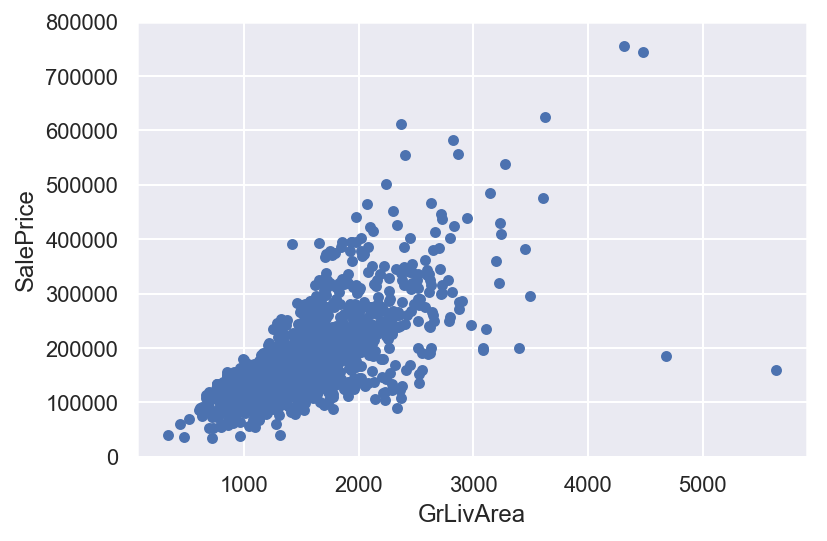

In [711]:
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


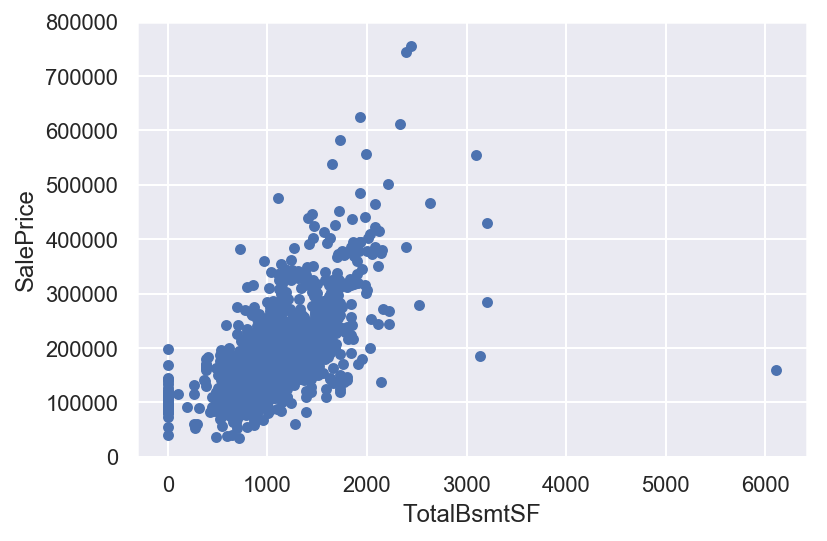

In [712]:
data = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));

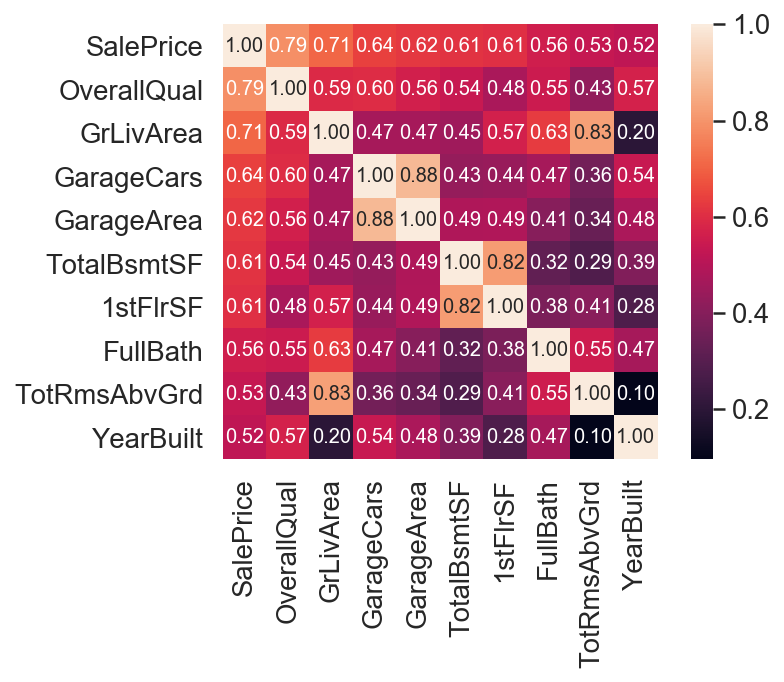

In [713]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
#time series analysis on YearBuilt 


/Users/basement/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


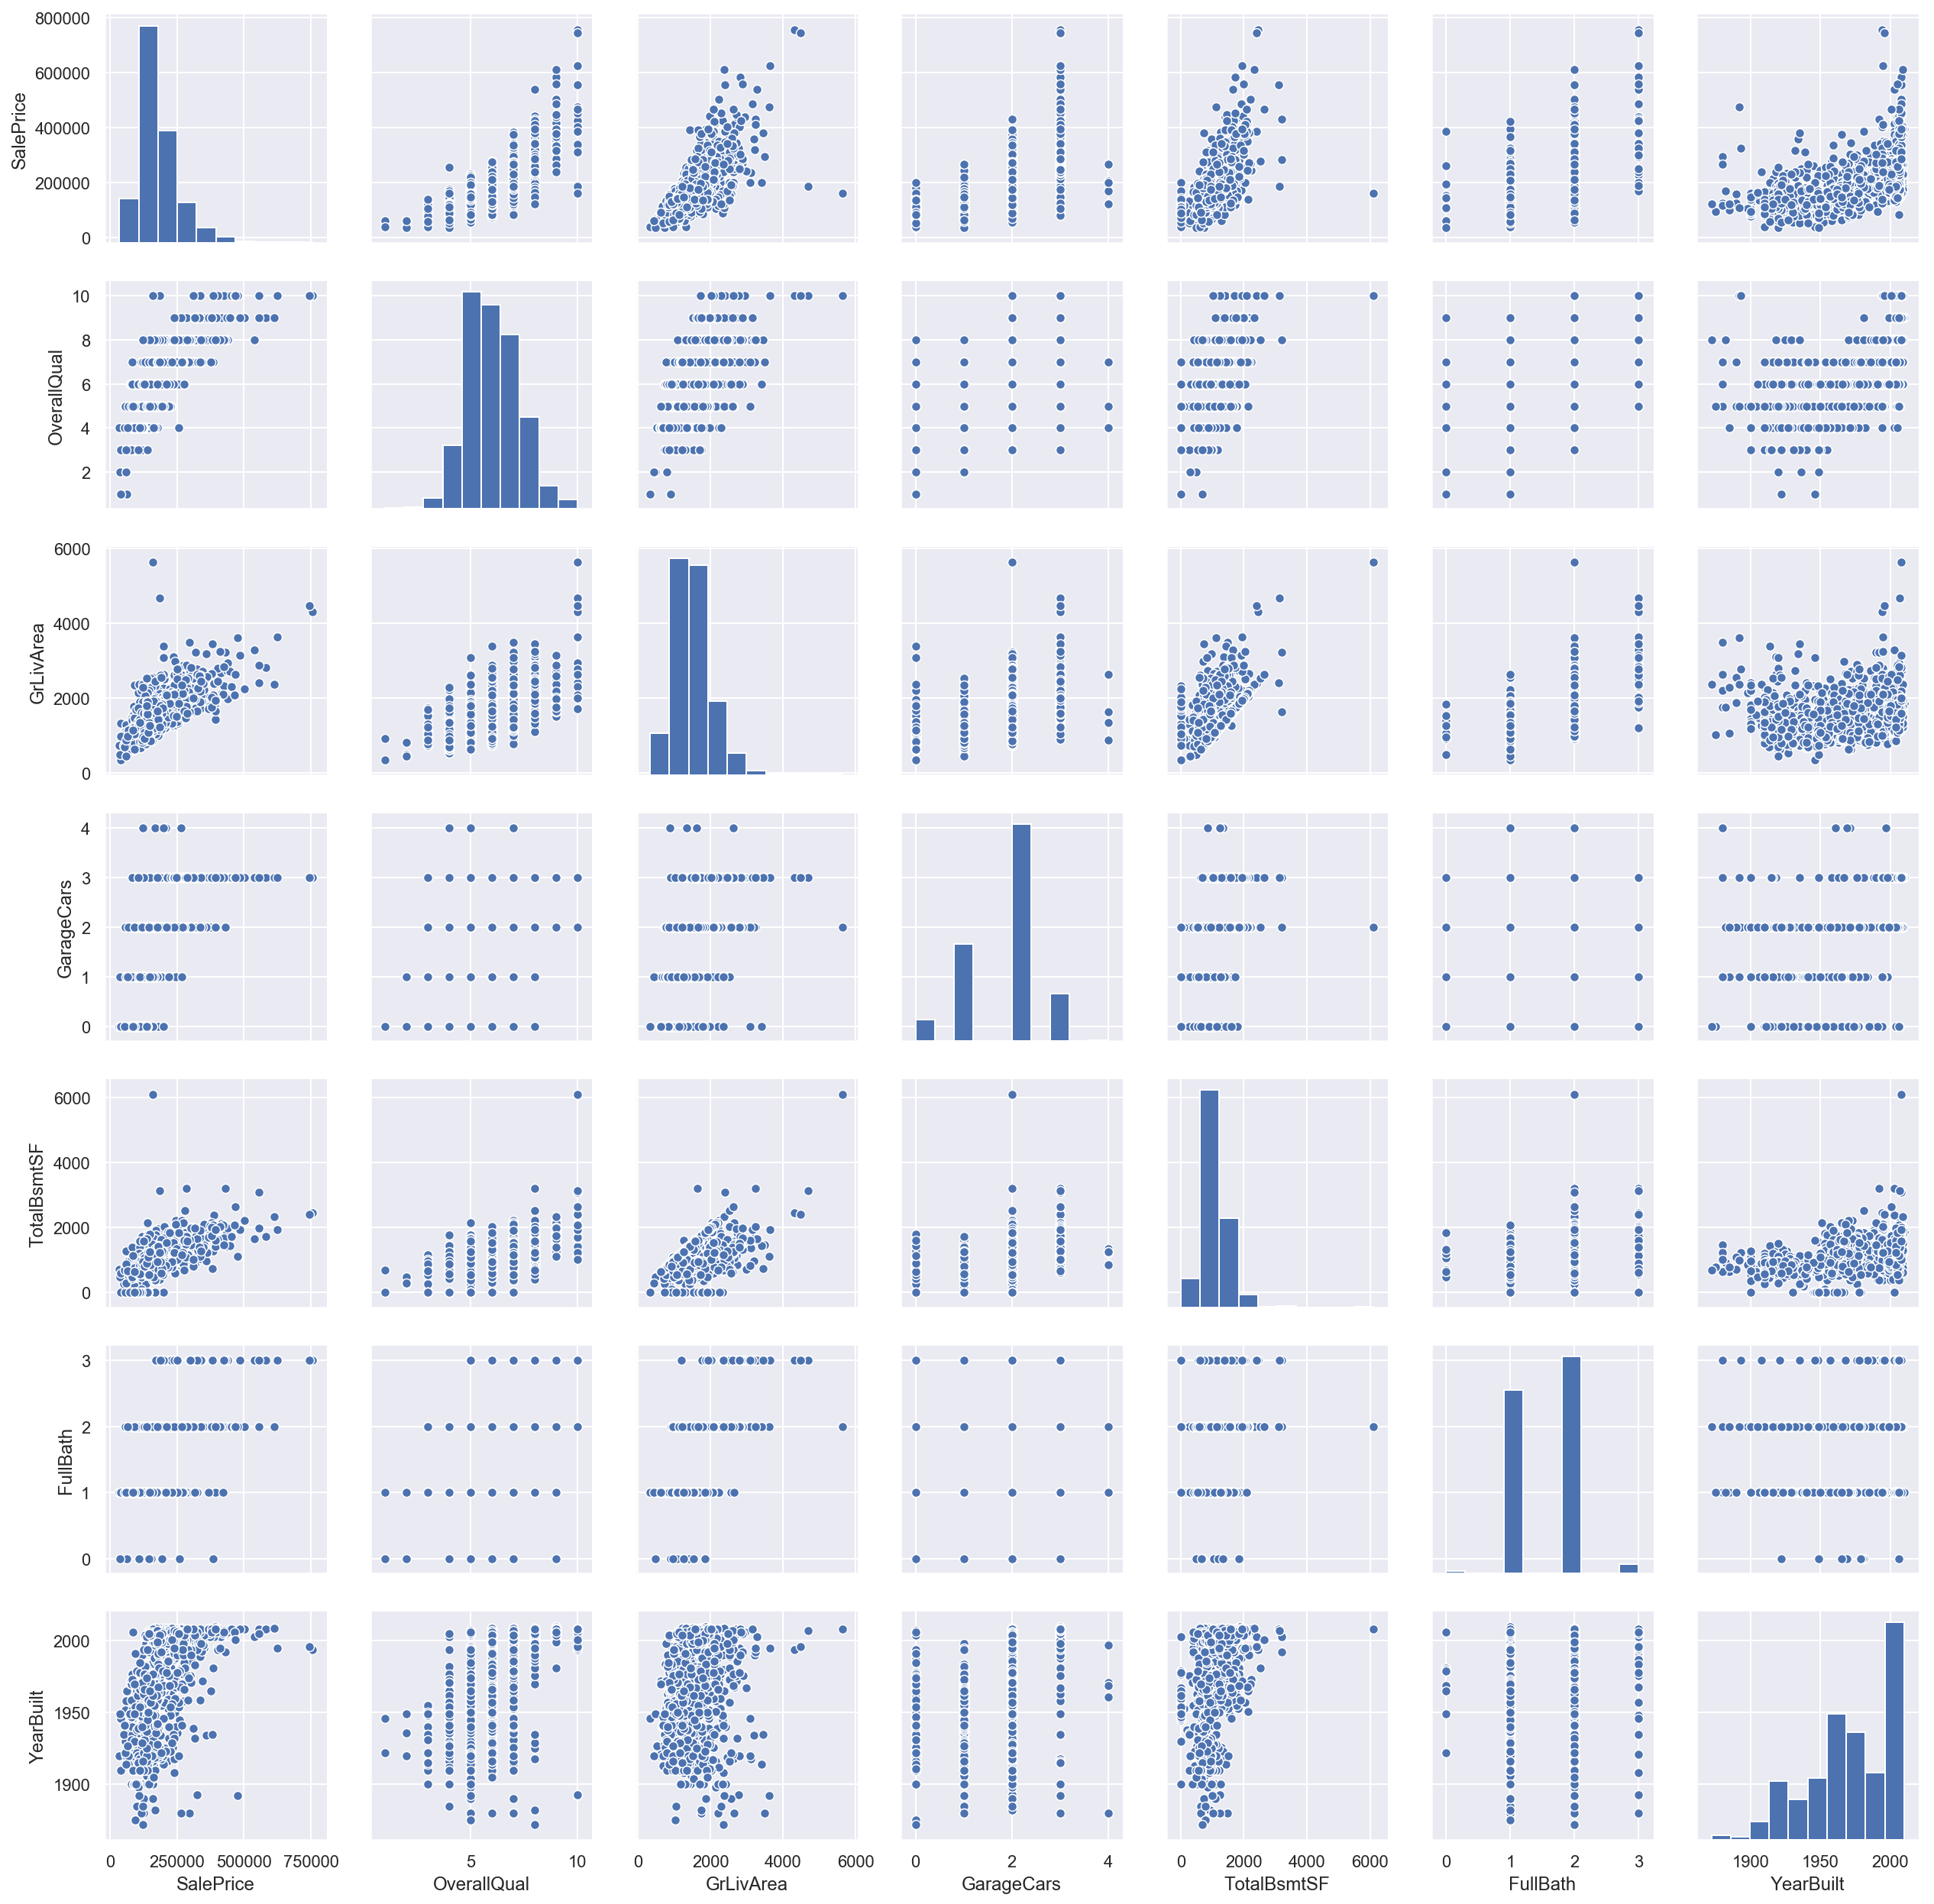

In [714]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

/Users/basement/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


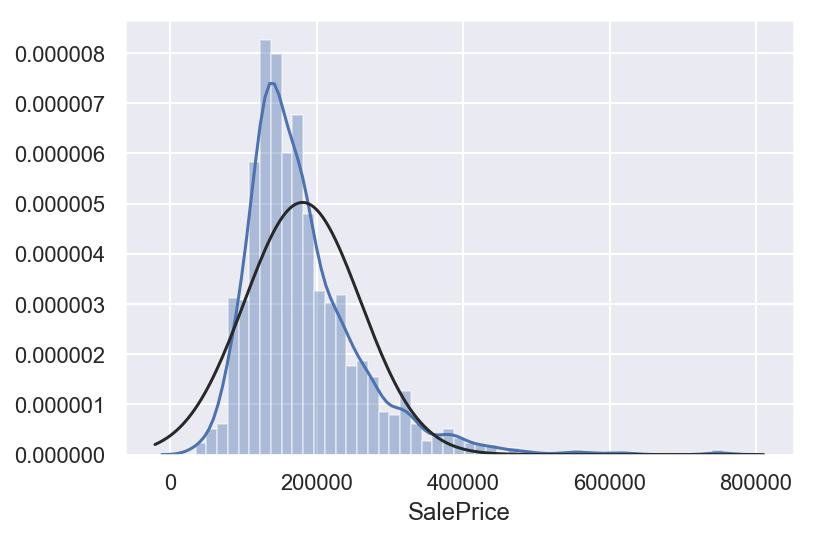

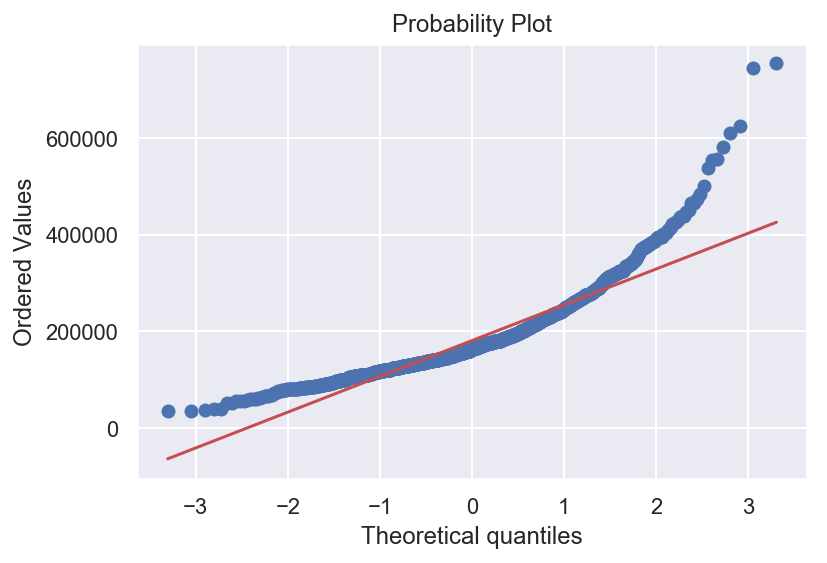

In [715]:
sns.distplot(df_train['SalePrice'] , fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [716]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

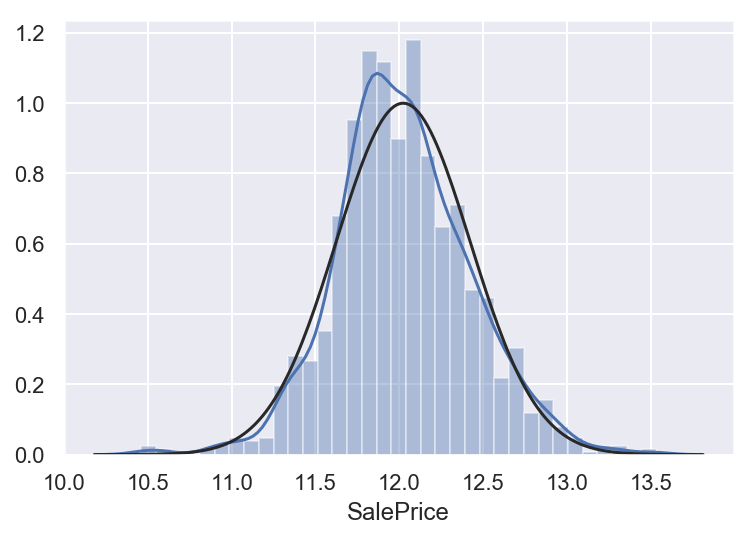

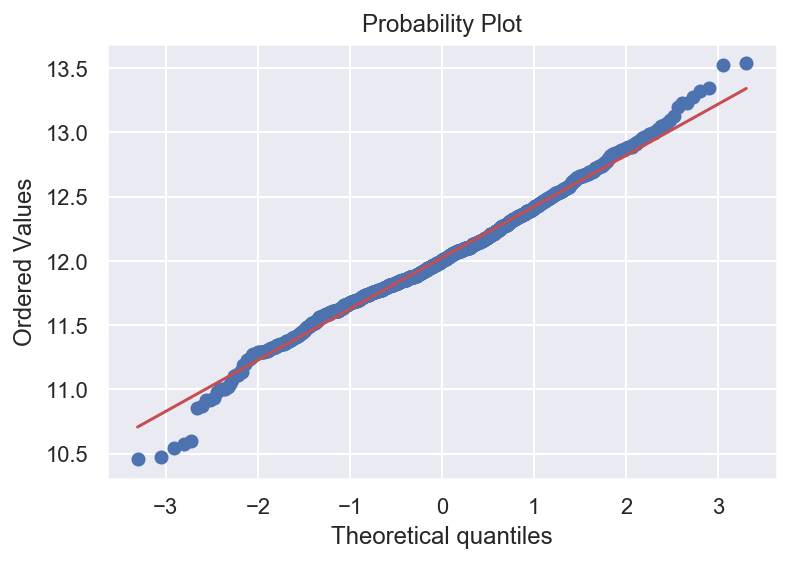

In [717]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [718]:
#log transformation 
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

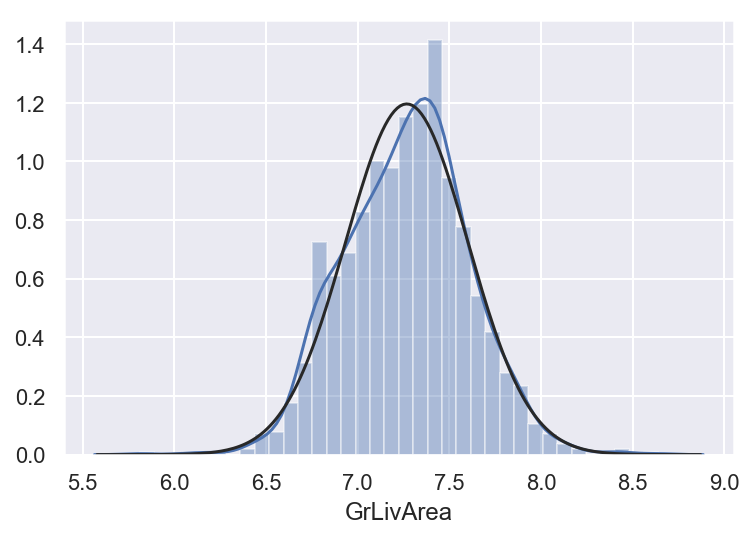

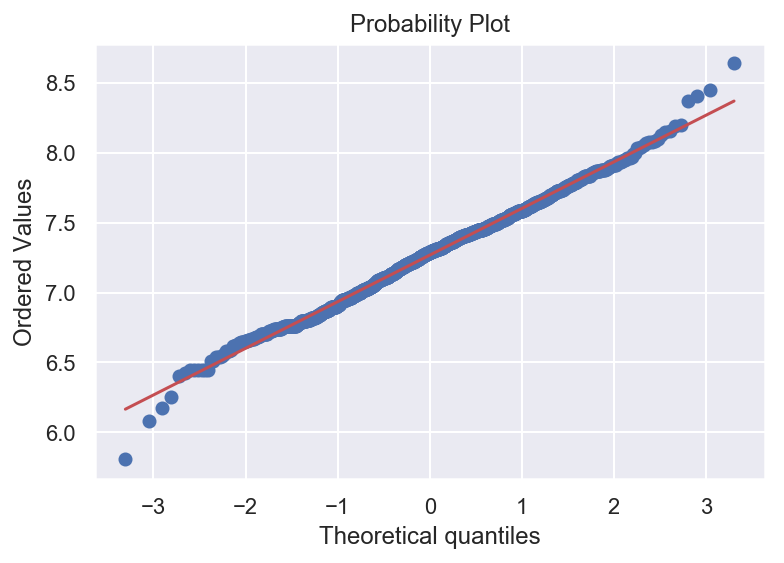

In [719]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

__Missing Value Imputation__

In [759]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [903]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995
MiscFeature,1406,0.963
Alley,1369,0.938
Fence,1179,0.808
FireplaceQu,690,0.473
LotFrontage,259,0.177
GarageCond,81,0.055
GarageType,81,0.055
GarageYrBlt,81,0.055
GarageFinish,81,0.055


In [1042]:
df_train.loc[:,"PoolQC"] = df_train.loc[:,"PoolQC"].fillna("None")
df_train.loc[:,"MiscFeature"] = df_train.loc[:,"MiscFeature"].fillna("None")
df_train.loc[:,"Alley"] = df_train.loc[:,"Alley"].fillna("None")
df_train.loc[:,"Fence"] = df_train.loc[:,"Fence"].fillna("None")
df_train.loc[:,"FireplaceQu"] = df_train.loc[:,"FireplaceQu"].fillna("None")
df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_train.loc[:,col] = df_train.loc[:,col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_train.loc[:,col] = df_train.loc[:,col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_train.loc[:,col] = df_train.loc[:,col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_train.loc[:,col] = df_train.loc[:,col].fillna('None')
    
df_train.loc[:,"MasVnrType"] = df_train.loc[:,"MasVnrType"].fillna("None")
df_train.loc[:,"MasVnrArea"] = df_train.loc[:,"MasVnrArea"].fillna(0)
df_train.loc[:,'MSZoning'] = df_train.loc[:,'MSZoning'].fillna(all_data['MSZoning'].mode()[0])
df_train = df_train.drop(['Utilities'], axis=1)
df_train.loc[:,"Functional"] = df_train.loc[:,"Functional"].fillna("Typ")
df_train.loc[:,'Electrical'] = df_train.loc[:,'Electrical'].fillna(all_data['Electrical'].mode()[0])
df_train.loc[:,'KitchenQual'] = df_train.loc[:,'KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
df_train.loc[:,'Exterior1st'] = df_train.loc[:,'Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
df_train.loc[:,'Exterior2nd'] = df_train.loc[:,'Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
df_train.loc[:,'SaleType'] = df_train.loc[:,'SaleType'].fillna(all_data['SaleType'].mode()[0])
df_train.loc[:,'MSSubClass'] = df_train.loc[:,'MSSubClass'].fillna("None")

In [1043]:
df_train_na = (df_train.isnull().sum() / len(all_data)) * 100
df_train_na = df_train_na.drop(df_train_na[df_train_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :df_train_na})
print(missing_data.head())
print("")
print(missing_data['Missing Ratio'].sum())

Empty DataFrame
Columns: [Missing Ratio]
Index: []

0.0


__Feature Engineering__

In [906]:
#MSSubClass=The building class
df_train.loc[:,'MSSubClass'] = df_train.loc[:,'MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
df_train.loc[:,'OverallCond'] = df_train.loc[:,'OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
df_train.loc[:,'YrSold'] = df_train.loc[:,'YrSold'].astype(str)
df_train.loc[:,'MoSold'] = df_train.loc[:,'MoSold'].astype(str)

In [907]:
# Encode some categorical features as ordered numbers when there is information in the order
df_train = df_train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"None" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"None" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

In [908]:
# Create new features
# 1* Simplifications of existing features
df_train["SimplOverallQual"] = df_train.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
df_train["SimplOverallCond"] = df_train.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
df_train["SimplPoolQC"] = df_train.PoolQC.replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })
df_train["SimplGarageCond"] = df_train.GarageCond.replace({1 : 1, # bad
                                                     2 : 2, 3 : 2, # average
                                                     4 : 3, 5 : 3 # good
                                                    })
df_train["SimplGarageQual"] = df_train.GarageQual.replace({1 : 1, # bad
                                                     2 : 2, 3 : 2, # average
                                                     4 : 3, 5 : 3 # good
                                                    })
df_train["SimplFireplaceQu"] = df_train.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 2, 3 : 2, # average
                                                       4 : 3, 5 : 3 # good
                                                      })
df_train["SimplFireplaceQu"] = df_train.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
df_train["SimplFunctional"] = df_train.Functional.replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })
df_train["SimplKitchenQual"] = df_train.KitchenQual.replace({1 : 1, # bad
                                                       2 : 2, 3 : 2, # average
                                                       4 : 3, 5 : 3 # good
                                                      })
df_train["SimplHeatingQC"] = df_train.HeatingQC.replace({1 : 1, # bad
                                                   2 : 2, 3 : 2, # average
                                                   4 : 3, 5 : 3 # good
                                                  })
df_train["SimplBsmtFinType1"] = df_train.BsmtFinType1.replace({1 : 1, # unfinished
                                                         2 : 2, 3 : 2, # rec room
                                                         4 : 3, 5 : 3, 6 : 3 # living quarters
                                                        })
df_train["SimplBsmtFinType2"] = df_train.BsmtFinType2.replace({1 : 1, # unfinished
                                                         2 : 2, 3 : 2, # rec room
                                                         4 : 3, 5 : 3, 6 : 3 # living quarters
                                                        })
df_train["SimplBsmtCond"] = df_train.BsmtCond.replace({1 : 1, # bad
                                                 2 : 2, 3 : 2, # average
                                                 4 : 3, 5 : 3 # good
                                                })
df_train["SimplBsmtQual"] = df_train.BsmtQual.replace({1 : 1, # bad
                                                 2 : 2, 3 : 2, # average
                                                 4 : 3, 5 : 3 # good
                                                })
df_train["SimplExterCond"] = df_train.ExterCond.replace({1 : 1, # bad
                                                   2 : 2, 3 : 2, # average
                                                   4 : 3, 5 : 3 # good
                                                  })
df_train["SimplExterQual"] = df_train.ExterQual.replace({1 : 1, # bad
                                                   2 : 2, 3 : 2, # average
                                                   4 : 3, 5 : 3 # good
                                                  })

In [909]:
# 2* Combinations of existing features
# Overall quality of the house
df_train["OverallGrade"] = df_train["OverallQual"] * df_train["OverallCond"]

# Overall garage score
df_train["GarageScore"] = df_train["GarageArea"] * df_train["GarageQual"]
# Overall quality of the garage
df_train["GarageGrade"] = df_train["GarageQual"] * df_train["GarageCond"]

#Check if this one has bigger correlation than the other two
df_train["TotalGarage"] = df_train["GarageArea"] * df_train["GarageQual"] * df_train["GarageCond"]

# Overall quality of the exterior
df_train["ExterGrade"] = df_train["ExterQual"] * df_train["ExterCond"]
# Overall kitchen score
df_train["KitchenScore"] = df_train["KitchenAbvGr"] * df_train["KitchenQual"]
# Overall fireplace score
df_train["FireplaceScore"] = df_train["Fireplaces"] * df_train["FireplaceQu"]
# Overall pool score

df_train["PoolScore"] = df_train["PoolArea"] * df_train["PoolQC"]

# Simplified overall pool score
df_train["SimplPoolScore"] = df_train["PoolArea"] * df_train["SimplPoolQC"]
# Simplified overall quality of the house
df_train["SimplOverallGrade"] = df_train["SimplOverallQual"] * df_train["SimplOverallCond"]
# Simplified overall quality of the exterior
df_train["SimplExterGrade"] = df_train["SimplExterQual"] * df_train["SimplExterCond"]
# Simplified overall garage score
df_train["SimplGarageScore"] = df_train["GarageArea"] * df_train["SimplGarageQual"]
# Simplified overall fireplace score
df_train["SimplFireplaceScore"] = df_train["Fireplaces"] * df_train["SimplFireplaceQu"]
# Simplified overall kitchen score
df_train["SimplKitchenScore"] = df_train["KitchenAbvGr"] * df_train["SimplKitchenQual"]
# Total number of bathrooms

df_train["TotalBath"] = df_train["BsmtFullBath"] + (0.5 * df_train["BsmtHalfBath"]) + df_train["FullBath"] + (0.5 * df_train["HalfBath"])

# Total SF for house (incl. basement)
df_train["AllSF"] = df_train["GrLivArea"] + df_train["TotalBsmtSF"]
# Total SF for 1st + 2nd floors
df_train["AllFlrsSF"] = df_train["1stFlrSF"] + df_train["2ndFlrSF"]
#Check if this one has bigger correlation than the other two
df_train["TotalSF"] = df_train["GrLivArea"] + df_train["TotalBsmtSF"] + df_train["1stFlrSF"] + df_train["2ndFlrSF"]

# Total SF for porch
df_train["AllPorchSF"] = df_train["OpenPorchSF"] + df_train["EnclosedPorch"] + df_train["3SsnPorch"] + df_train["ScreenPorch"]
# Has masonry veneer or not
df_train["HasMasVnr"] = df_train.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                               "Stone" : 1, "None" : 0})
# House completed before sale or not
df_train["HomeCompleteorNot"] = df_train.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                      "Family" : 0, "Normal" : 0, "Partial" : 1})

/Users/basement/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


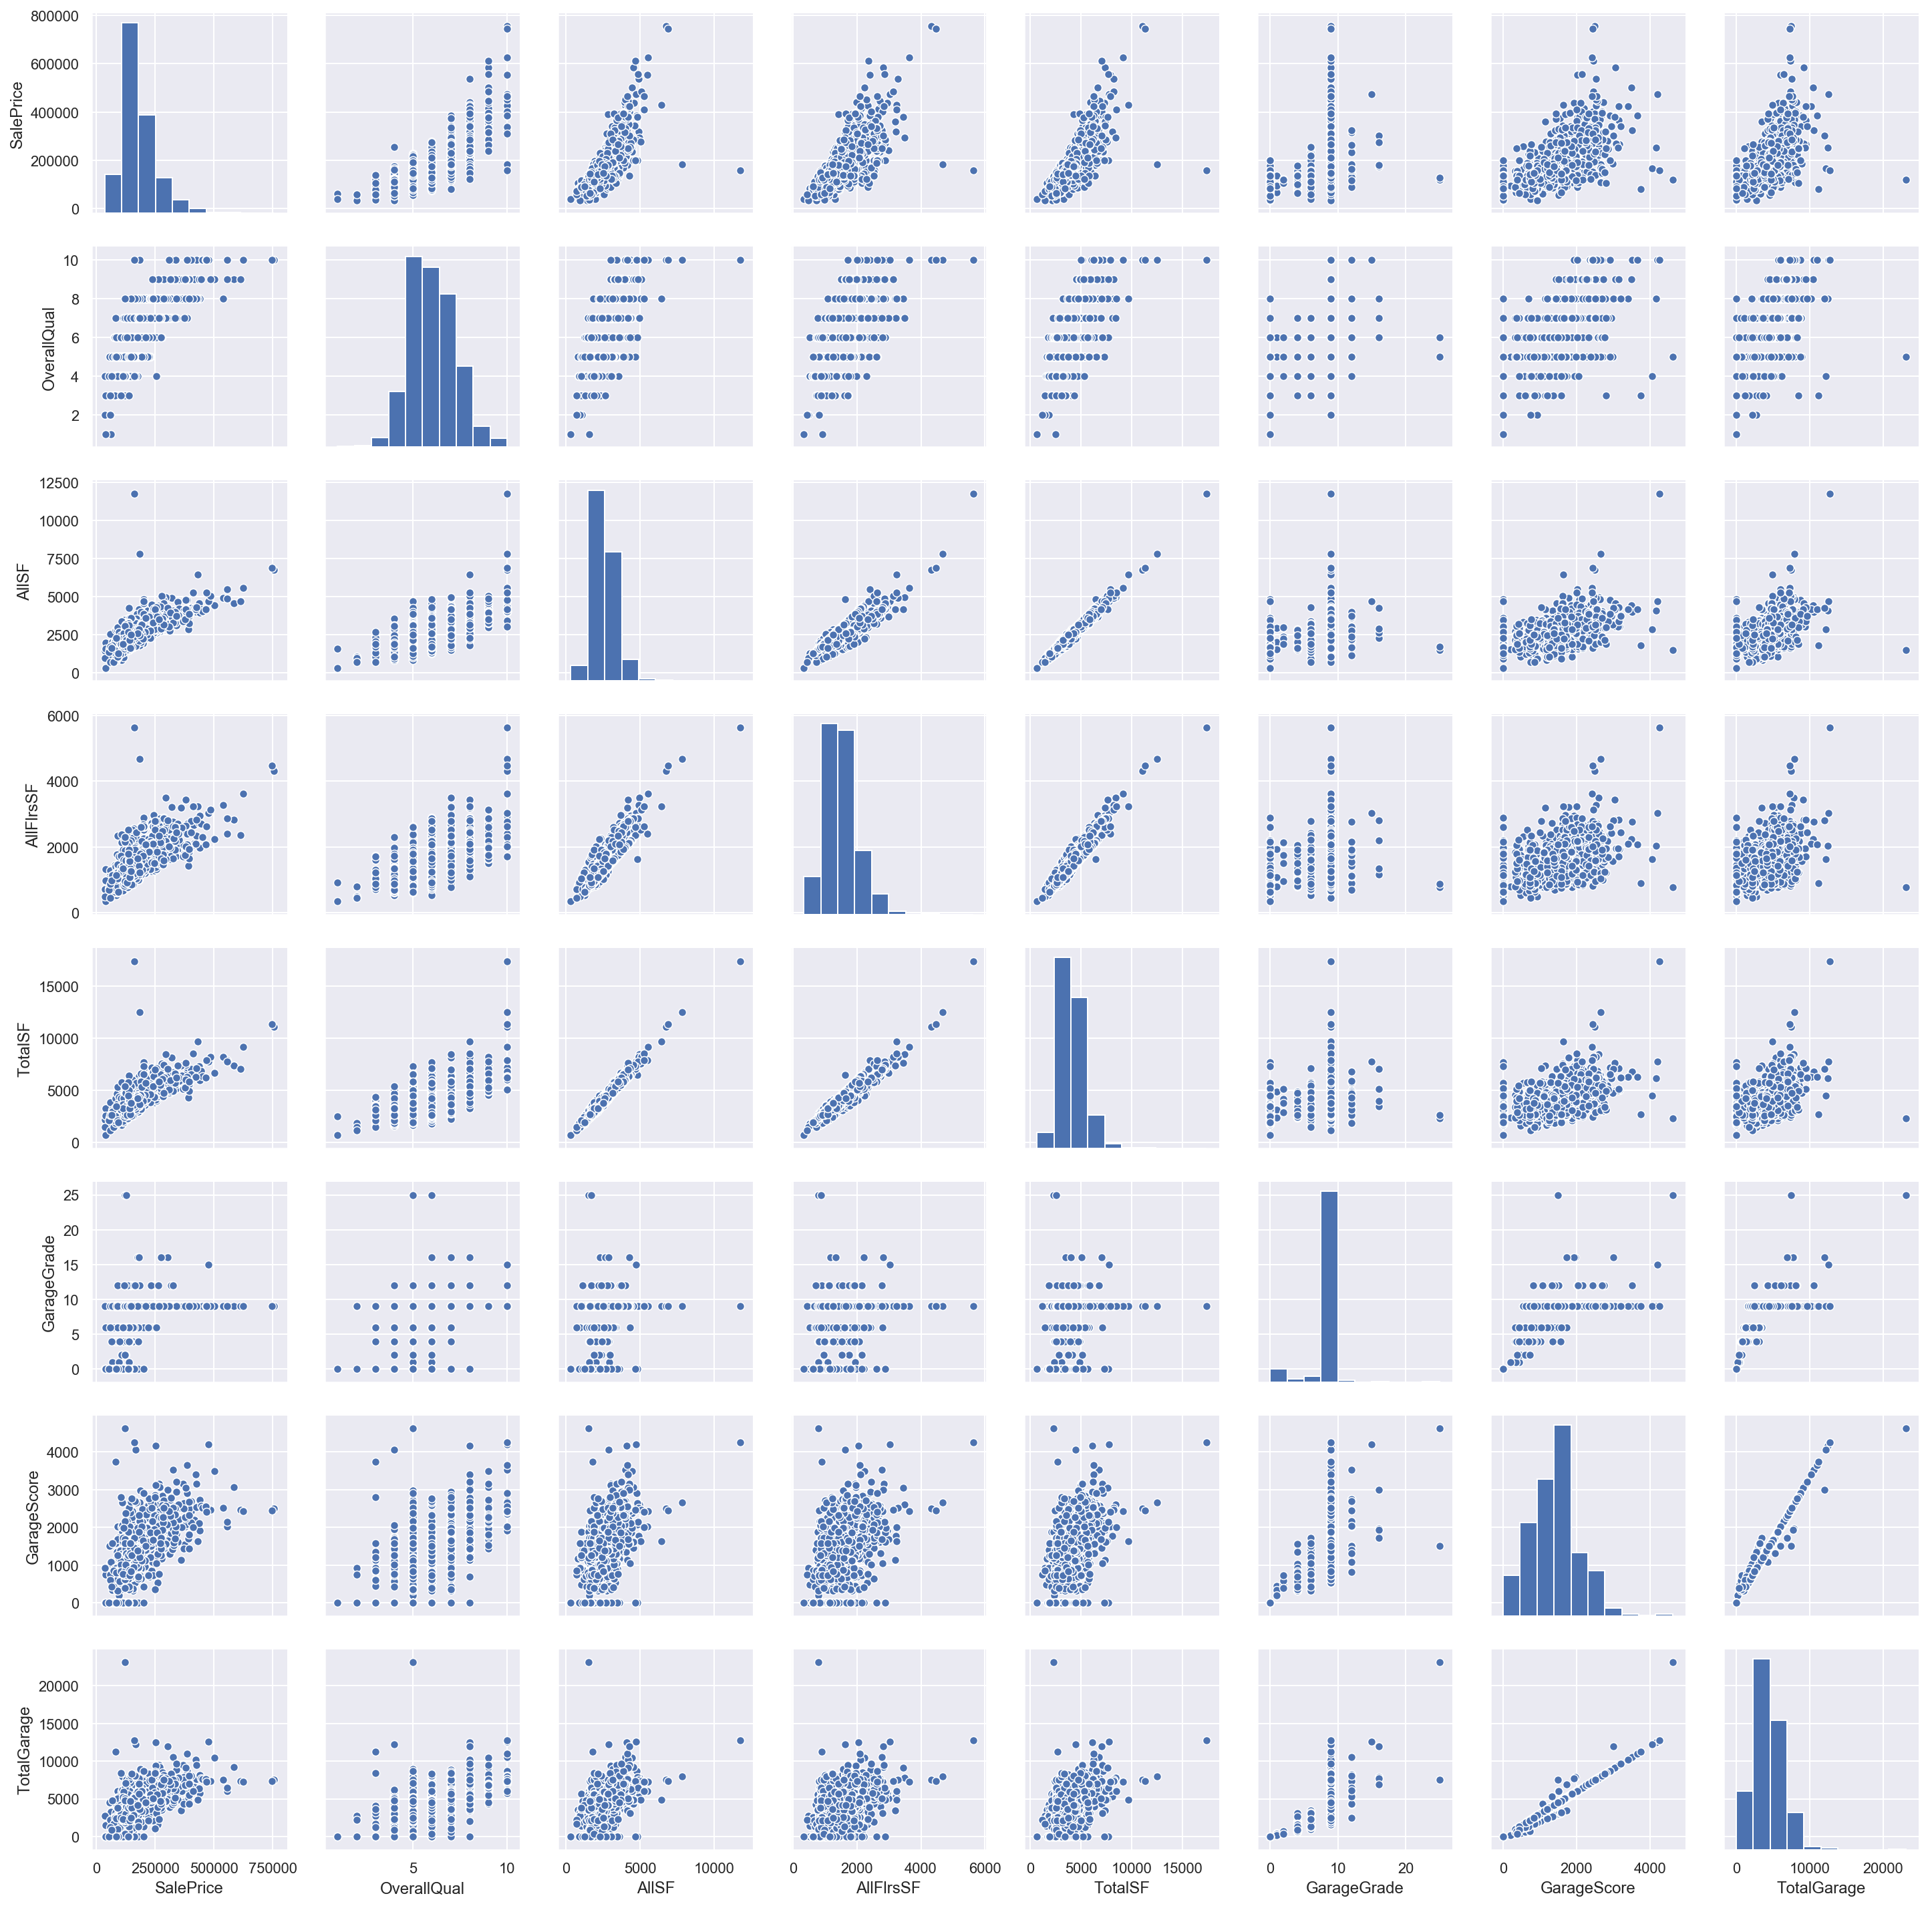

In [910]:
#scatterplot
sns.set()
cols = ['SalePrice','OverallQual', 'AllSF', 'AllFlrsSF', 'TotalSF', 'GarageGrade', 'GarageScore', 'TotalGarage']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [911]:
# Create new features
# 3* Polynomials on the top 10 existing features
#polynomial regression -> does this when you believe the correlation is not 
df_train["OverallQual-s2"] = df_train["OverallQual"] ** 2
df_train["OverallQual-s3"] = df_train["OverallQual"] ** 3
df_train["OverallQual-Sq"] = np.sqrt(df_train["OverallQual"])
df_train["AllSF-2"] = df_train["AllSF"] ** 2
df_train["AllSF-3"] = df_train["AllSF"] ** 3
df_train["AllSF-Sq"] = np.sqrt(df_train["AllSF"])
df_train["AllFlrsSF-2"] = df_train["AllFlrsSF"] ** 2
df_train["AllFlrsSF-3"] = df_train["AllFlrsSF"] ** 3
df_train["AllFlrsSF-Sq"] = np.sqrt(df_train["AllFlrsSF"])

df_train["TotalSF-2"] = df_train["TotalSF"] ** 2
df_train["TotalSF-3"] = df_train["TotalSF"] ** 3
df_train["TotalSF-Sq"] = np.sqrt(df_train["TotalSF"])

df_train["GrLivArea-2"] = df_train["GrLivArea"] ** 2
df_train["GrLivArea-3"] = df_train["GrLivArea"] ** 3
df_train["GrLivArea-Sq"] = np.sqrt(df_train["GrLivArea"])
df_train["SimplOverallQual-s2"] = df_train["SimplOverallQual"] ** 2
df_train["SimplOverallQual-s3"] = df_train["SimplOverallQual"] ** 3
df_train["SimplOverallQual-Sq"] = np.sqrt(df_train["SimplOverallQual"])
df_train["ExterQual-2"] = df_train["ExterQual"] ** 2
df_train["ExterQual-3"] = df_train["ExterQual"] ** 3
df_train["ExterQual-Sq"] = np.sqrt(df_train["ExterQual"])
df_train["GarageCars-2"] = df_train["GarageCars"] ** 2
df_train["GarageCars-3"] = df_train["GarageCars"] ** 3
df_train["GarageCars-Sq"] = np.sqrt(df_train["GarageCars"])
df_train["TotalBath-2"] = df_train["TotalBath"] ** 2
df_train["TotalBath-3"] = df_train["TotalBath"] ** 3
df_train["TotalBath-Sq"] = np.sqrt(df_train["TotalBath"])
df_train["KitchenQual-2"] = df_train["KitchenQual"] ** 2
df_train["KitchenQual-3"] = df_train["KitchenQual"] ** 3
df_train["KitchenQual-Sq"] = np.sqrt(df_train["KitchenQual"])
df_train["GarageScore-2"] = df_train["GarageScore"] ** 2
df_train["GarageScore-3"] = df_train["GarageScore"] ** 3
df_train["GarageScore-Sq"] = np.sqrt(df_train["GarageScore"])

df_train["TotalGarage-2"] = df_train["TotalGarage"] ** 2
df_train["TotalGarage-3"] = df_train["TotalGarage"] ** 3
df_train["TotalGarage-Sq"] = np.sqrt(df_train["TotalGarage"])

__Box Cox Transformation for skewed feature__

In [912]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    df_train[feat] = boxcox1p(df_train[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 81 skewed numerical features to Box Cox transform


__Dummification__

In [913]:
categorical = df_train.select_dtypes(include = ["object"]).columns
numerical = df_train.select_dtypes(exclude = ["object"]).columns
print("Number of Categorical features: " + str(len(categorical)))
print("Number of Numerical features: " + str(len(numerical)))
df_train_categorical = df_train[categorical]
df_train_numerical = df_train[numerical]

Number of Categorical features: 34
Number of Numerical features: 118


In [914]:
df_train_categorical = pd.get_dummies(df_train_categorical)

In [915]:
train = pd.concat([df_train_numerical, df_train_categorical], axis = 1)
train.shape

(1460, 436)

In [916]:
train.columns

Index(['Id', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandSlope',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       ...
       'SimplOverallGrade_66', 'SimplOverallGrade_666', 'SimplOverallGrade_7',
       'SimplOverallGrade_77', 'SimplOverallGrade_777', 'SimplOverallGrade_8',
       'SimplOverallGrade_88', 'SimplOverallGrade_888', 'SimplOverallGrade_99',
       'SimplOverallGrade_999'],
      dtype='object', length=436)

__Modeling__

In [917]:
from sklearn.linear_model import ElasticNet, Ridge, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [918]:
# Standardize numerical features
# stdSc = RobustScaler()
# train.loc[:, numerical] = stdSc.fit_transform(train.loc[:, numerical])

In [919]:
train_Y = np.log(train.SalePrice.values)

In [920]:
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

#Validation function
n_folds = 5

def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df_train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, train_Y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [921]:
ridge = make_pipeline(RobustScaler(), Ridge(alpha =0.0005, random_state=1))
score = rmse_cv(ridge)
print("\nRidge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Ridge score: 0.0036 (0.0004)



In [779]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmse_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.0041 (0.0004)



In [922]:
train = train.drop(["SalePrice","Id"], axis=1)

In [1358]:
lasso1 = Lasso(alpha =0.0005, random_state=1)

lasso1.fit(train.values, df_train_Y)
print(lasso1.score(train.values, df_train_Y))
prediction_train = lasso1.predict(train)
print(prediction_train)
mean_squared_error(df_train_Y, prediction_train)

0.9426095883349261
[204518.30172291 191931.59107751 213361.63942579 ... 269131.48402899
 147749.91179357 137984.16579219]


/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


361949193.1977848

In [868]:
lasso.score(train.values, train_Y)

AttributeError: 'Pipeline' object has no attribute 'score_'

In [780]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmse_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.0041 (0.0004)



In [781]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = rmse_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.0157 (0.0014)



In [41]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
score = rmse_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

KeyboardInterrupt: 

__Test Data__

__Missing Value Imputation__

In [228]:
#missing data
total = df_total.isnull().sum().sort_values(ascending=False)
percent = (df_total.isnull().sum()/df_total.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,2909,0.997
MiscFeature,2814,0.964
Alley,2721,0.932
Fence,2348,0.804
FireplaceQu,1420,0.486
LotFrontage,486,0.166
GarageCond,159,0.054
GarageQual,159,0.054
GarageYrBlt,159,0.054
GarageFinish,159,0.054


In [229]:
df_total.loc[:,"PoolQC"] = df_total.loc[:,"PoolQC"].fillna("None")
df_total.loc[:,"MiscFeature"] = df_total.loc[:,"MiscFeature"].fillna("None")
df_total.loc[:,"Alley"] = df_total.loc[:,"Alley"].fillna("None")
df_total.loc[:,"Fence"] = df_total.loc[:,"Fence"].fillna("None")
df_total.loc[:,"FireplaceQu"] = df_total.loc[:,"FireplaceQu"].fillna("None")
df_total["LotFrontage"] = df_total.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_total.loc[:,col] = df_total.loc[:,col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_total.loc[:,col] =  df_total.loc[:,col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_total.loc[:,col] = df_total.loc[:,col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_total.loc[:,col] = df_total.loc[:,col].fillna('None')
    
df_total.loc[:,"MasVnrType"] = df_total.loc[:,"MasVnrType"].fillna("None")
df_total.loc[:,"MasVnrArea"] = df_total.loc[:,"MasVnrArea"].fillna(0)
df_total.loc[:,'MSZoning'] = df_total.loc[:,'MSZoning'].fillna(df_total['MSZoning'].mode()[0])
df_total = df_total.drop(['Utilities'], axis=1)
df_total.loc[:,"Functional"] = df_total.loc[:,"Functional"].fillna("Typ")
df_total.loc[:,'Electrical'] = df_total.loc[:,'Electrical'].fillna(df_total['Electrical'].mode()[0])
df_total.loc[:,'KitchenQual'] = df_total.loc[:,'KitchenQual'].fillna(df_total['KitchenQual'].mode()[0])
df_total.loc[:,'Exterior1st'] = df_total.loc[:,'Exterior1st'].fillna(df_total['Exterior1st'].mode()[0])
df_total.loc[:,'Exterior2nd'] = df_total.loc[:,'Exterior2nd'].fillna(df_total['Exterior2nd'].mode()[0])
df_total.loc[:,'SaleType'] = df_total.loc[:,'SaleType'].fillna(df_total['SaleType'].mode()[0])
df_total.loc[:,'MSSubClass'] = df_total.loc[:,'MSSubClass'].fillna("None")

In [230]:
df_total_na = (df_total.isnull().sum() / len(df_total)) * 100
df_total_na = df_total_na.drop(df_total_na[df_total_na == 0].index).sort_values(ascending=False)
missing_df_total = pd.DataFrame({'Missing Ratio' :df_total_na})
print(missing_df_total.head())
print("")
print(missing_df_total['Missing Ratio'].sum())

Empty DataFrame
Columns: [Missing Ratio]
Index: []

0.0


__Feature Engineering__

In [214]:
# df_total['GrLivArea'] = np.log(df_total['GrLivArea'])

In [231]:
#MSSubClass=The building class
df_total.loc[:,'MSSubClass'] = df_total.loc[:,'MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
df_total.loc[:,'OverallCond'] = df_total.loc[:,'OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
df_total.loc[:,'YrSold'] = df_total.loc[:,'YrSold'].astype(str)
df_total.loc[:,'MoSold'] = df_total.loc[:,'MoSold'].astype(str)

In [216]:
# Encode some categorical features as ordered numbers when there is information in the order
df_total = df_total.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"None" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"None" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

In [217]:
# Create new features
# 1* Simplifications of existing features
df_total["SimplOverallQual"] = df_total.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
df_total["SimplOverallCond"] = df_total.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
df_total["SimplPoolQC"] = df_total.PoolQC.replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })
df_total["SimplGarageCond"] = df_total.GarageCond.replace({1 : 1, # bad
                                                     2 : 2, 3 : 2, # average
                                                     4 : 3, 5 : 3 # good
                                                    })
df_total["SimplGarageQual"] = df_total.GarageQual.replace({1 : 1, # bad
                                                     2 : 2, 3 : 2, # average
                                                     4 : 3, 5 : 3 # good
                                                    })
df_total["SimplFireplaceQu"] = df_total.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 2, 3 : 2, # average
                                                       4 : 3, 5 : 3 # good
                                                      })
df_total["SimplFireplaceQu"] = df_total.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
df_total["SimplFunctional"] = df_total.Functional.replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })
df_total["SimplKitchenQual"] = df_total.KitchenQual.replace({1 : 1, # bad
                                                       2 : 2, 3 : 2, # average
                                                       4 : 3, 5 : 3 # good
                                                      })
df_total["SimplHeatingQC"] = df_total.HeatingQC.replace({1 : 1, # bad
                                                   2 : 2, 3 : 2, # average
                                                   4 : 3, 5 : 3 # good
                                                  })
df_total["SimplBsmtFinType1"] = df_total.BsmtFinType1.replace({1 : 1, # unfinished
                                                         2 : 2, 3 : 2, # rec room
                                                         4 : 3, 5 : 3, 6 : 3 # living quarters
                                                        })
df_total["SimplBsmtFinType2"] = df_total.BsmtFinType2.replace({1 : 1, # unfinished
                                                         2 : 2, 3 : 2, # rec room
                                                         4 : 3, 5 : 3, 6 : 3 # living quarters
                                                        })
df_total["SimplBsmtCond"] = df_total.BsmtCond.replace({1 : 1, # bad
                                                 2 : 2, 3 : 2, # average
                                                 4 : 3, 5 : 3 # good
                                                })
df_total["SimplBsmtQual"] = df_total.BsmtQual.replace({1 : 1, # bad
                                                 2 : 2, 3 : 2, # average
                                                 4 : 3, 5 : 3 # good
                                                })
df_total["SimplExterCond"] = df_total.ExterCond.replace({1 : 1, # bad
                                                   2 : 2, 3 : 2, # average
                                                   4 : 3, 5 : 3 # good
                                                  })
df_total["SimplExterQual"] = df_total.ExterQual.replace({1 : 1, # bad
                                                   2 : 2, 3 : 2, # average
                                                   4 : 3, 5 : 3 # good
                                                  })

In [218]:
# 2* Combinations of existing features
# Overall quality of the house
df_total["OverallGrade"] = df_total["OverallQual"] * df_total["OverallCond"]

# Overall garage score
df_total["GarageScore"] = df_total["GarageArea"] * df_total["GarageQual"]
# Overall quality of the garage
df_total["GarageGrade"] = df_total["GarageQual"] * df_total["GarageCond"]

#Check if this one has bigger correlation than the other two
df_total["TotalGarage"] = df_total["GarageArea"] * df_total["GarageQual"] * df_total["GarageCond"]

# Overall quality of the exterior
df_total["ExterGrade"] = df_total["ExterQual"] * df_total["ExterCond"]
# Overall kitchen score
df_total["KitchenScore"] = df_total["KitchenAbvGr"] * df_total["KitchenQual"]
# Overall fireplace score
df_total["FireplaceScore"] = df_total["Fireplaces"] * df_total["FireplaceQu"]
# Overall pool score

df_total["PoolScore"] = df_total["PoolArea"] * df_total["PoolQC"]

# Simplified overall pool score
df_total["SimplPoolScore"] = df_total["PoolArea"] * df_total["SimplPoolQC"]
# Simplified overall quality of the house
df_total["SimplOverallGrade"] = df_total["SimplOverallQual"] * df_total["SimplOverallCond"]
# Simplified overall quality of the exterior
df_total["SimplExterGrade"] = df_total["SimplExterQual"] * df_total["SimplExterCond"]
# Simplified overall garage score
df_total["SimplGarageScore"] = df_total["GarageArea"] * df_total["SimplGarageQual"]
# Simplified overall fireplace score
df_total["SimplFireplaceScore"] = df_total["Fireplaces"] * df_total["SimplFireplaceQu"]
# Simplified overall kitchen score
df_total["SimplKitchenScore"] = df_total["KitchenAbvGr"] * df_total["SimplKitchenQual"]
# Total number of bathrooms

df_total["TotalBath"] = df_total["BsmtFullBath"] + (0.5 * df_total["BsmtHalfBath"]) + df_total["FullBath"] + (0.5 * df_total["HalfBath"])

# Total SF for house (incl. basement)
df_total["AllSF"] = df_total["GrLivArea"] + df_total["TotalBsmtSF"]
# Total SF for 1st + 2nd floors
df_total["AllFlrsSF"] = df_total["1stFlrSF"] + df_total["2ndFlrSF"]
#Check if this one has bigger correlation than the other two
df_total["TotalSF"] = df_total["GrLivArea"] + df_total["TotalBsmtSF"] + df_total["1stFlrSF"] + df_total["2ndFlrSF"]

# Total SF for porch
df_total["AllPorchSF"] = df_total["OpenPorchSF"] + df_total["EnclosedPorch"] + df_total["3SsnPorch"] + df_total["ScreenPorch"]
# Has masonry veneer or not
df_total["HasMasVnr"] = df_total.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                               "Stone" : 1, "None" : 0})
# House completed before sale or not
df_total["HomeCompleteorNot"] = df_total.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                      "Family" : 0, "Normal" : 0, "Partial" : 1})


In [219]:
# Create new features
# 3* Polynomials on the top 10 existing features
#polynomial regression -> does this when you believe the correlation is not 
df_total["OverallQual-s2"] = df_total["OverallQual"] ** 2
df_total["OverallQual-s3"] = df_total["OverallQual"] ** 3
df_total["OverallQual-Sq"] = np.sqrt(df_total["OverallQual"])
df_total["AllSF-2"] = df_total["AllSF"] ** 2
df_total["AllSF-3"] = df_total["AllSF"] ** 3
df_total["AllSF-Sq"] = np.sqrt(df_total["AllSF"])
df_total["AllFlrsSF-2"] = df_total["AllFlrsSF"] ** 2
df_total["AllFlrsSF-3"] = df_total["AllFlrsSF"] ** 3
df_total["AllFlrsSF-Sq"] = np.sqrt(df_total["AllFlrsSF"])

df_total["TotalSF-2"] = df_total["TotalSF"] ** 2
df_total["TotalSF-3"] = df_total["TotalSF"] ** 3
df_total["TotalSF-Sq"] = np.sqrt(df_total["TotalSF"])

df_total["GrLivArea-2"] = df_total["GrLivArea"] ** 2
df_total["GrLivArea-3"] = df_total["GrLivArea"] ** 3
df_total["GrLivArea-Sq"] = np.sqrt(df_total["GrLivArea"])
df_total["SimplOverallQual-s2"] = df_total["SimplOverallQual"] ** 2
df_total["SimplOverallQual-s3"] = df_total["SimplOverallQual"] ** 3
df_total["SimplOverallQual-Sq"] = np.sqrt(df_total["SimplOverallQual"])
df_total["ExterQual-2"] = df_total["ExterQual"] ** 2
df_total["ExterQual-3"] = df_total["ExterQual"] ** 3
df_total["ExterQual-Sq"] = np.sqrt(df_total["ExterQual"])
df_total["GarageCars-2"] = df_total["GarageCars"] ** 2
df_total["GarageCars-3"] = df_total["GarageCars"] ** 3
df_total["GarageCars-Sq"] = np.sqrt(df_total["GarageCars"])
df_total["TotalBath-2"] = df_total["TotalBath"] ** 2
df_total["TotalBath-3"] = df_total["TotalBath"] ** 3
df_total["TotalBath-Sq"] = np.sqrt(df_total["TotalBath"])
df_total["KitchenQual-2"] = df_total["KitchenQual"] ** 2
df_total["KitchenQual-3"] = df_total["KitchenQual"] ** 3
df_total["KitchenQual-Sq"] = np.sqrt(df_total["KitchenQual"])
df_total["GarageScore-2"] = df_total["GarageScore"] ** 2
df_total["GarageScore-3"] = df_total["GarageScore"] ** 3
df_total["GarageScore-Sq"] = np.sqrt(df_total["GarageScore"])

#3df_total["TotalGarage-2"] = df_total["TotalGarage"] ** 2
#df_total["TotalGarage-3"] = df_total["TotalGarage"] ** 3
#df_total["TotalGarage-Sq"] = np.sqrt(df_total["TotalGarage"])


__Box Cox__

In [232]:
numeric_feats = df_total.dtypes[df_total.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df_total[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.947
PoolArea,16.898
LotArea,12.822
LowQualFinSF,12.089
3SsnPorch,11.376
KitchenAbvGr,4.302
BsmtFinSF2,4.146
EnclosedPorch,4.004
ScreenPorch,3.947
BsmtHalfBath,3.932


In [233]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
#skewed_features = skewed_features.drop("SalePrice")
for feat in skewed_features:
    #all_data[feat] += 1
    df_total[feat] = boxcox1p(df_total[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 32 skewed numerical features to Box Cox transform


__Dummification__

In [234]:
categorical = df_total.select_dtypes(include = ["object"]).columns
numerical = df_total.select_dtypes(exclude = ["object"]).columns
print("Number of Categorical features: " + str(len(categorical)))
print("Number of Numerical features: " + str(len(numerical)))
df_total_categorical = df_total[categorical]
df_total_numerical = df_total[numerical]

Number of Categorical features: 46
Number of Numerical features: 32


In [235]:
df_total_categorical = pd.get_dummies(df_total_categorical)

In [236]:
total = pd.concat([df_total_numerical, df_total_categorical], axis = 1)
total.shape

(2919, 338)

In [237]:
train = total[:ntrain]
test = total[ntrain:]

__Modeling__

In [238]:
from sklearn.linear_model import ElasticNet, Ridge, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [363]:
from bayes_opt import BayesianOptimization

In [239]:
print(train.shape)
print(test.shape)

(1460, 338)
(1459, 338)


In [240]:
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

#Validation function
n_folds = 5

def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df_train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, df_train_Y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [285]:
-grid.best_score_

0.01606783470894624

In [313]:
param_grid = {
     'ridge__alpha': list(np.linspace(0,0.1,200))
}
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring=scorer)
grid.fit(train.values, df_train_Y)
print('Best Params:')
print(grid.best_params_)

Best Params:
{'ridge__alpha': 0.1}


In [312]:
ridge = make_pipeline(RobustScaler(), Ridge(alpha = 0.1, random_state=1))
score = rmse_cv(ridge)
print("\nRidge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Ridge score: 0.1417 (0.0181)



In [314]:
param_grid = {
     'lasso__alpha': list(np.linspace(0,0.1,200))
}
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring=scorer)
grid.fit(train.values, df_train_Y)
print('Best Params:')
print(grid.best_params_)

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:267: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:267: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_pa

Best Params:
{'lasso__alpha': 0.0005025125628140704}


In [310]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005025125628140704, random_state=1))
score = rmse_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1241 (0.0160)



In [375]:
lasso.fit(train.values, df_train_Y)
print(lasso.score(train.values, df_train_Y))
# train_pred = lasso.predict(train.values)
# pred = np.expm1(lasso.predict(test.values))
# prediction_train = np.expm1(lasso.predict(train))
# print(rmse_cv(prediction_train))
# mean_squared_error(df_train_Y, prediction_train)

0.9316461841488349


In [330]:
grid.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__memory', 'estimator__steps', 'estimator__robustscaler', 'estimator__elasticnet', 'estimator__robustscaler__copy', 'estimator__robustscaler__quantile_range', 'estimator__robustscaler__with_centering', 'estimator__robustscaler__with_scaling', 'estimator__elasticnet__alpha', 'estimator__elasticnet__copy_X', 'estimator__elasticnet__fit_intercept', 'estimator__elasticnet__l1_ratio', 'estimator__elasticnet__max_iter', 'estimator__elasticnet__normalize', 'estimator__elasticnet__positive', 'estimator__elasticnet__precompute', 'estimator__elasticnet__random_state', 'estimator__elasticnet__selection', 'estimator__elasticnet__tol', 'estimator__elasticnet__warm_start', 'estimator', 'fit_params', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [334]:
ENet = ElasticNet()
param_grid = {
     'alpha': list(np.linspace(0,0.1,200)),
     'l1_ratio': list(np.linspace(0,1,100)) 
}
grid = GridSearchCV(estimator=ENet, param_grid=param_grid, cv=5, scoring=scorer)
grid.fit(train.values, df_train_Y)
print('Best Params:')
print(grid.best_params_)

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  esti

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Use

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  esti

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Use

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  esti

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/basement/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

Best Params:
{'alpha': 0.0005025125628140704, 'l1_ratio': 1.0}


In [335]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005025125628140704, l1_ratio=1, random_state=3))
score = rmse_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1241 (0.0160)



In [ ]:
param_grid = {
     'lasso__alpha': list(np.linspace(0,0.1,200))
}
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring=scorer)
grid.fit(train.values, df_train_Y)
print('Best Params:')
print(grid.best_params_)

In [350]:
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train,df_train_Y)
gsearch2.best_params_, -gsearch2.best_score_

({'max_depth': 15, 'min_samples_split': 200}, 0.018095745933682197)

In [351]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.018095745933682197,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = rmse_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



Gradient Boosting score: 0.1228 (0.0137)



In [245]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
score = rmse_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1237 (0.0087)



In [373]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

In [374]:
averaged_models = AveragingModels(models = (ENet, GBoost, model_xgb, lasso))

score = rmse_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1187 (0.0132)



In [376]:
averaged_models.fit(train.values, df_train_Y)
print(averaged_models.score(train.values, df_train_Y))

0.952893118194322


In [251]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [252]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [1516]:
#base models for randomforest regression, ExtraTreeRegression, GradientBoostingRegressor, XGB Regressor
base_models = [
        RandomForestRegressor(
            n_jobs=1, random_state=0,
            n_estimators=500, max_features=18, max_depth=11
        ),
        ExtraTreesRegressor(
            n_jobs=1, random_state=0, 
            n_estimators=500, max_features=20
        ),
        GradientBoostingRegressor(
            random_state=0, 
            n_estimators=500, max_features=10, max_depth=6,
            learning_rate=0.05, subsample=0.8
        ),
        XGBRegressor(
            seed=0,
            n_estimators=500, max_depth=7,
            learning_rate=0.05, subsample=0.8, colsample_bytree=0.75
        ),
    ]

In [253]:
stacked_averaged_models = StackingAveragedModels(base_models = base_models,
                                                 meta_model = ridge)

score = rmse_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1206 (0.0133)


In [392]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, model_xgb),
                                                 meta_model = lasso)

score = rmse_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1208 (0.0139)


In [398]:
stacked_averaged_models.fit(train.values, df_train_Y)

StackingAveragedModels(base_models=(Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('elasticnet', ElasticNet(alpha=0.0005025125628140704, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=Fal...=0.464,
       reg_lambda=0.8571, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.5213)),
            meta_model=Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('lasso', Lasso(alpha=0.0005025125628140704, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=1, selection='cyclic', tol=0.0001, warm_start=False))]),
            n_folds=5)

In [401]:
predicted = stacked_averaged_models.predict(test.values)

In [400]:
predicted = averaged_models.predict(test.values)

In [402]:
predicted= np.exp(predicted)

In [256]:
#np.exp ->convert -> nparray to dataframe - concat(id, prediction, index=False)
#columns/rows 
#id numbers

In [403]:
predicted = pd.DataFrame(predicted, columns =['SalePrice'],index=None)

In [404]:
predicted.shape

(1459, 1)

In [405]:
testid.index = predicted.index
Fin = pd.concat([testid, predicted], axis= 1)
print (Fin)

        Id  SalePrice
0     1461 122038.527
1     1462 156814.137
2     1463 184165.045
3     1464 197422.237
4     1465 193042.570
5     1466 173791.255
6     1467 176169.368
7     1468 164229.989
8     1469 190300.183
9     1470 122619.020
10    1471 193208.163
11    1472  96255.945
12    1473  95552.041
13    1474 146856.623
14    1475 113714.639
15    1476 365415.197
16    1477 248546.162
17    1478 293355.167
18    1479 300086.286
19    1480 488527.892
20    1481 322543.124
21    1482 209076.597
22    1483 178454.885
23    1484 165059.407
24    1485 187285.645
25    1486 195911.121
26    1487 335119.772
27    1488 235924.499
28    1489 200356.313
29    1490 241955.525
...    ...        ...
1429  2890  78665.425
1430  2891 133750.633
1431  2892  45481.830
1432  2893  76375.845
1433  2894  57092.648
1434  2895 330886.396
1435  2896 283300.154
1436  2897 208573.953
1437  2898 147873.454
1438  2899 210234.793
1439  2900 155677.734
1440  2901 208423.452
1441  2902 190284.039
1442  2903

In [406]:
finalcsv = Fin.to_csv("final.csv",index=False)

In [261]:
type(Fin.Id[0])

numpy.int64